In [1]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('coffee.csv')

In [3]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1653 non-null   object 
 1   datetime     1653 non-null   object 
 2   cash_type    1653 non-null   object 
 3   card         1564 non-null   object 
 4   money        1653 non-null   float64
 5   coffee_name  1653 non-null   object 
dtypes: float64(1), object(5)
memory usage: 77.6+ KB


In [5]:
df.describe()

,money
count,1653.000000
mean,31.581174
std,5.380129
min,18.120000
25%,27.920000
50%,32.820000
75%,37.720000
max,40.000000


In [6]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [7]:
#card column is something we do not need for our analysis, so we are going to drop the column
df.drop(columns = 'card', inplace = True)

In [8]:
#check for duplicated values
df.duplicated().sum()

0

In [9]:
df

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,38.70,Latte
...,...,...,...,...,...
1648,2024-09-22,2024-09-22 21:08:14.798,card,27.92,Americano with Milk
1649,2024-09-22,2024-09-22 21:54:04.098,card,32.82,Hot Chocolate
1650,2024-09-22,2024-09-22 21:54:54.497,card,32.82,Hot Chocolate
1651,2024-09-22,2024-09-22 22:37:02.384,card,23.02,Americano


In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [11]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [12]:
coffee_color = '#6F4E37'

In [13]:
count = df['coffee_name'].value_counts().reset_index()


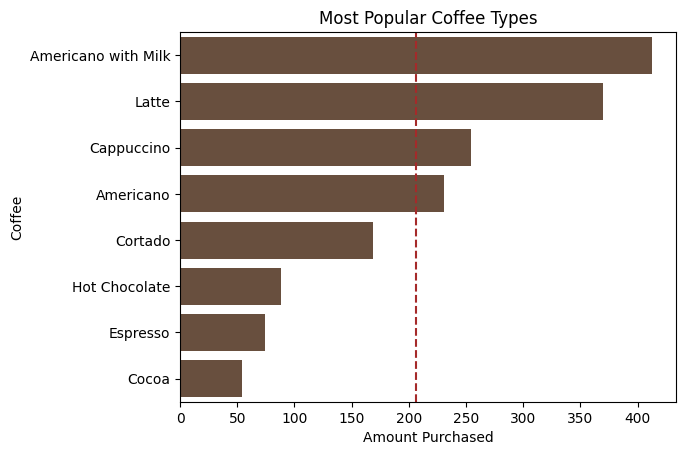

In [14]:
sns.barplot(count, x = 'count', y = 'coffee_name', color = coffee_color)
plt.xlabel('Amount Purchased')
plt.ylabel('Coffee')
plt.title('Most Popular Coffee Types')
plt.axvline(x = count['count'].mean(), color = 'brown', linestyle = '--')

In [15]:
df

,date,datetime,cash_type,money,coffee_name,year,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,38.70,Latte,2024,3,1,10
1,2024-03-01,2024-03-01 12:19:22.539,card,38.70,Hot Chocolate,2024,3,1,12
2,2024-03-01,2024-03-01 12:20:18.089,card,38.70,Hot Chocolate,2024,3,1,12
3,2024-03-01,2024-03-01 13:46:33.006,card,28.90,Americano,2024,3,1,13
4,2024-03-01,2024-03-01 13:48:14.626,card,38.70,Latte,2024,3,1,13
...,...,...,...,...,...,...,...,...,...
1648,2024-09-22,2024-09-22 21:08:14.798,card,27.92,Americano with Milk,2024,9,22,21
1649,2024-09-22,2024-09-22 21:54:04.098,card,32.82,Hot Chocolate,2024,9,22,21
1650,2024-09-22,2024-09-22 21:54:54.497,card,32.82,Hot Chocolate,2024,9,22,21
1651,2024-09-22,2024-09-22 22:37:02.384,card,23.02,Americano,2024,9,22,22


Text(0.5, 1.0, 'Monthly Sales of Coffee')

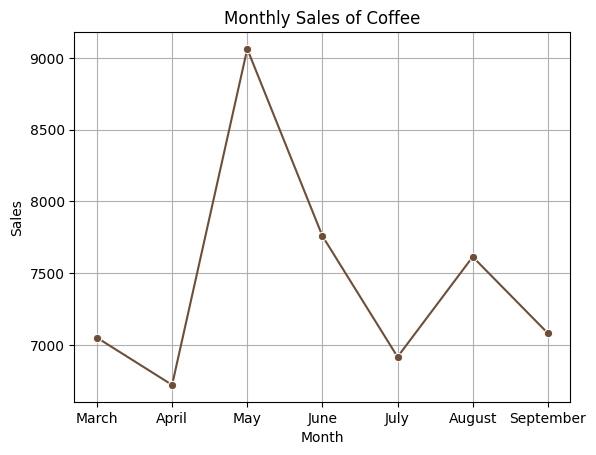

In [16]:
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_sales = df.groupby('month')['money'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].map(month_map)

sns.lineplot(monthly_sales, x = 'month', y = 'money', color = coffee_color, marker = 'o')
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales of Coffee')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1653 non-null   object        
 1   datetime     1653 non-null   datetime64[ns]
 2   cash_type    1653 non-null   object        
 3   money        1653 non-null   float64       
 4   coffee_name  1653 non-null   object        
 5   year         1653 non-null   int32         
 6   month        1653 non-null   int32         
 7   day          1653 non-null   int32         
 8   hour         1653 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(4), object(3)
memory usage: 90.5+ KB


In [18]:
df['date'] = pd.to_datetime(df['date'])  

daily_sales = df.groupby(df['date'].dt.date)['money'].sum().reset_index()

# Rename columns for clarity
daily_sales.columns = ['sale_date', 'daily_sales']

# Sort by date
daily_sales = daily_sales.sort_values('sale_date')
daily_sales

,sale_date,daily_sales
0,2024-03-01,396.30
1,2024-03-02,228.10
2,2024-03-03,349.10
3,2024-03-04,135.20
4,2024-03-05,338.50
...,...,...
198,2024-09-18,121.48
199,2024-09-19,157.72
200,2024-09-20,195.44
201,2024-09-21,428.60


Text(0.5, 1.0, 'Daily Sales of Coffee')

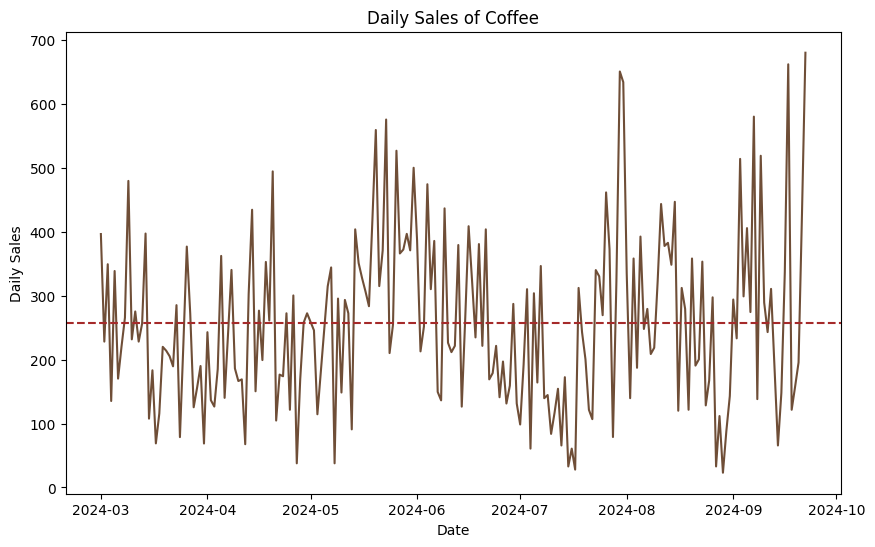

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(daily_sales, x = 'sale_date', y = 'daily_sales', color = coffee_color)
plt.axhline(y = daily_sales['daily_sales'].mean(), linestyle = '--', color = 'brown')
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.title('Daily Sales of Coffee')

Text(0.5, 1.0, 'Hourly Sales of Coffee')

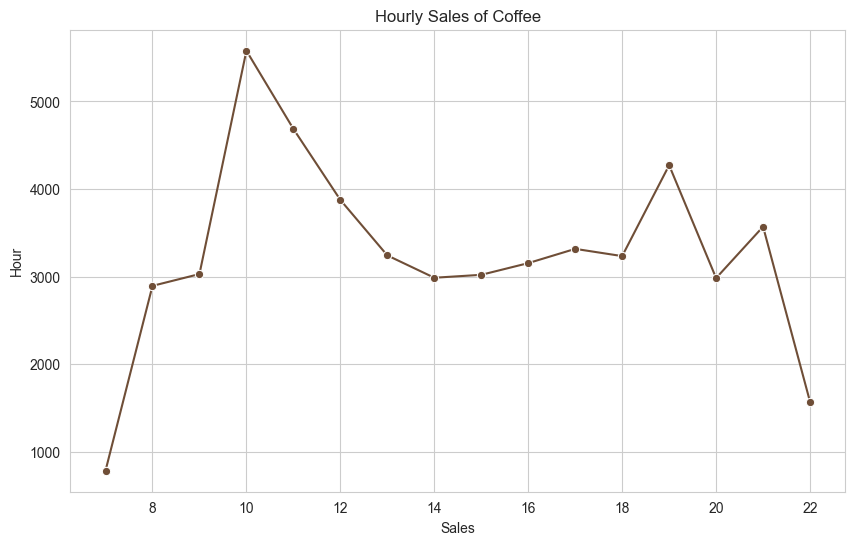

In [22]:
hour_sales = df.groupby(df['hour'])['money'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(hour_sales, x = 'hour', y = 'money', color = coffee_color, marker = 'o')
sns.set_style('darkgrid')
plt.xlabel('Sales')
plt.ylabel('Hour')
plt.title('Hourly Sales of Coffee')

Text(0.5, 1.0, 'Total Sales by Hour Per Coffee Type')

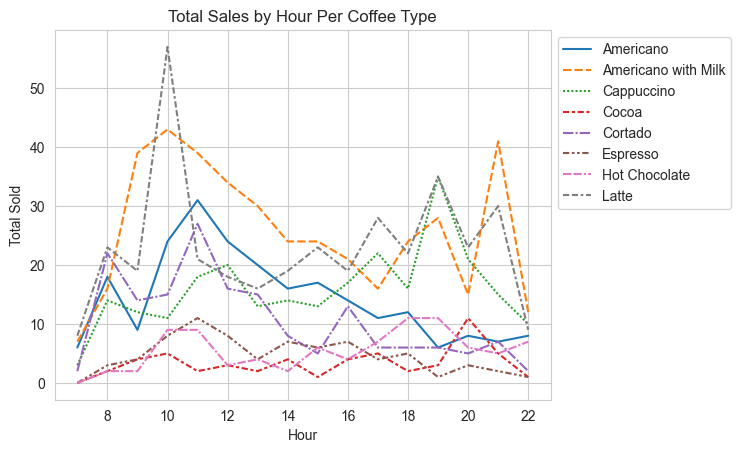

In [21]:
hour_coffee_sales = df.groupby(['hour', 'coffee_name']).size().unstack(fill_value=0)
hour_coffee_sales
sns.lineplot(hour_coffee_sales)
sns.set_style('whitegrid')
plt.legend(bbox_to_anchor = (1,1))
plt.xlabel('Hour')
plt.ylabel('Total Sold')
plt.title('Total Sales by Hour Per Coffee Type')
